In [1]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.5.2


In [212]:
from pandas import read_csv
from matplotlib import pyplot

In [213]:
# load dataset
df = pd.read_csv(r'F:\DS\KAGGLE DATASET\Car price Dataset\car_price_prediction.csv')

In [214]:
# summarize shape
print(df.shape)

(19237, 18)


In [215]:
# summarize first few lines
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [216]:
df = df.drop(['ID','Doors'],axis = 1)

In [217]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [218]:
df.rename(columns = {'Prod. year':'Prod_year'}, inplace = True)
df.rename(columns = {'Leather interior':'Leather_interior'}, inplace = True)  
df.rename(columns = {'Fuel type':'Fuel_type'}, inplace = True)
df.rename(columns = {'Engine volume':'Engine_volume'}, inplace = True)
df.rename(columns = {'Gear box type':'Gear_box_type'}, inplace = True)    
df.rename(columns = {'Drive wheels':'Drive_wheels'}, inplace = True)

In [219]:
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


# Basic EDA part

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod_year         19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather_interior  19237 non-null  object 
 7   Fuel_type         19237 non-null  object 
 8   Engine_volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear_box_type     19237 non-null  object 
 12  Drive_wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memo

In [221]:
df.replace('-' , np.nan , inplace = True)

In [222]:
df.columns[df.isnull().sum() > 0]

Index(['Levy'], dtype='object')

In [223]:
df.Levy = df.Levy.astype(float) 

In [224]:
df.Levy = df.Levy.fillna(df.Levy.mean())

In [225]:
df.isnull().sum()  # find missing values

Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [226]:
df.shape

(19237, 16)

In [227]:
df.columns[df.isnull().sum() > 0] 

Index([], dtype='object')

In [228]:
df.columns[df.dtypes == 'object']  # check

Index(['Manufacturer', 'Model', 'Category', 'Leather_interior', 'Fuel_type',
       'Engine_volume', 'Mileage', 'Gear_box_type', 'Drive_wheels', 'Wheel',
       'Color'],
      dtype='object')

In [229]:
df.describe()

,Price,Levy,Prod_year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,906.838128,2010.912824,4.582991,6.582627
std,1.905813e+05,385.733455,5.668673,1.199933,4.320168
min,1.000000e+00,87.000000,1939.000000,1.000000,0.000000
25%,5.331000e+03,730.000000,2009.000000,4.000000,4.000000
50%,1.317200e+04,906.838128,2012.000000,4.000000,6.000000
75%,2.207500e+04,917.000000,2015.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod_year         19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather_interior  19237 non-null  object 
 7   Fuel_type         19237 non-null  object 
 8   Engine_volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear_box_type     19237 non-null  object 
 12  Drive_wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(2), int64(3), object(11)
memo

# Data Cleaning

In [231]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [232]:
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Model'] = le.fit_transform(df['Model'])
df['Engine_volume'] = le.fit_transform(df['Engine_volume'])
df['Mileage'] = le.fit_transform(df['Mileage'])

In [233]:
df.Category  = df.Category.replace({'Sedan':0 , 'Jeep':1,'Hatchback':2,'Minivan':3,'Coupe':4, 'Universal':5,'Microbus':6, 'Goods wagon':7, 'Pickup':8 ,'Cabriolet':9, 'Limousine':10})
df.Leather_interior  = df.Leather_interior.replace({'Yes':0 , 'No':1})
df.Fuel_type  = df.Fuel_type.replace({'Petrol':0 , 'Diesel':1, 'Hybrid':2,'LPG':3, 'CNG':4, 'Plug-in Hybrid':5,'Hydrogen':6})
df.Leather_interior  = df.Leather_interior.replace({'Automatic':0 , 'Tiptronic':1, 'Manual':3, 'Variator':4,})
df.Leather_interior  = df.Leather_interior.replace({'Front':0 , '4x4':1, 'Rear':3})
df.Wheel = df.Wheel.replace({'Left wheel':0 , 'Right-hand drive':1})
df.Color  = df.Color.replace({'Black':0 , 'White':1,'Silver':2,'Grey':3,'Blue':4, 'Red':5,'Green':6, 'Orange':7, 'Brown':8 ,'Carnelian red':9, 'Golden':10,'Beige':11,'Sky blue':12,'Yellow':13,'Purple':14,'Pink':15})
df.Gear_box_type = df.Gear_box_type.replace({'Automatic':0 , 'Tiptronic':1, 'Manual':3 , 'Variator':4})
df.Drive_wheels = df.Drive_wheels.replace({'Front':0 , '4x4':1, 'Rear':3})

In [234]:
df.columns[df.dtypes == 'object']  # check

Index([], dtype='object')

In [235]:
len(df.columns[df.dtypes == 'object'])

0

In [236]:
df.columns[df.dtypes == 'object']  # check

Index([], dtype='object')

In [237]:
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
0,13328,1399.000000,32,1242,2010,1,0,2,63,2838,6.0,0,1,0,2,12
1,16621,1018.000000,8,658,2011,1,1,0,56,2960,6.0,1,1,0,0,8
2,8467,906.838128,21,684,2006,2,1,0,22,3140,4.0,4,0,1,0,2
3,3607,862.000000,16,661,2011,1,0,2,46,2413,4.0,0,1,0,1,0
4,11726,446.000000,21,684,2014,2,0,0,22,7396,4.0,0,0,0,2,4


In [308]:
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
0,13328,1399.000000,32,1242,2010,1,0,2,63,2838,6.0,0,1,0,2,12
1,16621,1018.000000,8,658,2011,1,1,0,56,2960,6.0,1,1,0,0,8
2,8467,906.838128,21,684,2006,2,1,0,22,3140,4.0,4,0,1,0,2
3,3607,862.000000,16,661,2011,1,0,2,46,2413,4.0,0,1,0,1,0
4,11726,446.000000,21,684,2014,2,0,0,22,7396,4.0,0,0,0,2,4


In [309]:
#  pip install -U yellowbrick

In [310]:
# create an xgboost regression model
# Import libraries with standard conventions
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error


In [311]:
df1.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
0,13328,1399.000000,32,1242,2010,1,0,2,63,2838,6.0,0,1,0,2,12
1,16621,1018.000000,8,658,2011,1,1,0,56,2960,6.0,1,1,0,0,8
2,8467,906.838128,21,684,2006,2,1,0,22,3140,4.0,4,0,1,0,2
3,3607,862.000000,16,661,2011,1,0,2,46,2413,4.0,0,1,0,1,0
4,11726,446.000000,21,684,2014,2,0,0,22,7396,4.0,0,0,0,2,4


# Sampling

In [312]:
# split data into input and output columns
x, y = df1.iloc[:,1:],df.iloc[:,0]

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=444, shuffle=True)

# from xgboost import XGBRegressor

In [314]:
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=444, learning_rate=0.05)

In [315]:
xgb_reg.fit(x_train, y_train)

[19:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objectvie='reg:squarederror',
             predictor='auto', random_state=444, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# ‘RMSE’ and ‘R-squared’ metrics

In [316]:
y_pred = xgb_reg.predict(x_test) # Predictions # Predictions

In [317]:
y_true = y_test # True values

In [318]:
MSE = mse(y_true, y_pred)
MSE

222633428.90809387

In [319]:
RMSE = np.sqrt(MSE)
RMSE

14920.905767013404

In [320]:
R_squared = r2_score(y_true, y_pred)
R_squared

0.38364540205568387

In [321]:
print("\nRMSE: ", np.round(RMSE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))


RMSE:  14920.91

R-Squared:  0.38


##  Making the Prediction Error Plot


Prediction Error Plot


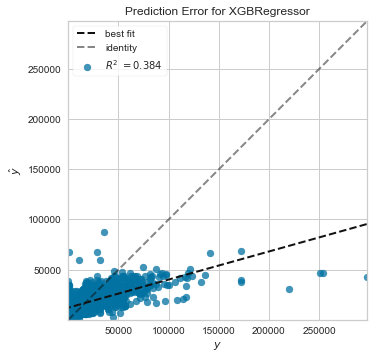

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=1,
                                       enable_categorical=False, gamma=0,
                                       gpu_id=-1, importance_type=None,
                                       interaction_constraints='',
                                       learning_rate=0.05, max_delta_step=0,
                                       max_depth=3, min_child_weight=1,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=100, n_jobs=2,
                                       num_parallel_tree=1,
                                       objectvie='reg:squarederror',
                             

In [322]:

print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, x_train, y_train, x_test, y_test))



In [323]:
y.describe().T

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

## L2 regularization to our XGBoost model

In [324]:
df.head()

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags
0,13328,1399.000000,32,1242,2010,1,0,2,63,2838,6.0,0,1,0,2,12
1,16621,1018.000000,8,658,2011,1,1,0,56,2960,6.0,1,1,0,0,8
2,8467,906.838128,21,684,2006,2,1,0,22,3140,4.0,4,0,1,0,2
3,3607,862.000000,16,661,2011,1,0,2,46,2413,4.0,0,1,0,1,0
4,11726,446.000000,21,684,2014,2,0,0,22,7396,4.0,0,0,0,2,4


In [325]:
df1 = df

In [326]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=444, shuffle=True)

In [328]:
xgb_reg.fit(x_train, y_train)

[19:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "objectvie" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objectvie='reg:squarederror',
             predictor='auto', random_state=444, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [329]:
y_pred = xgb_reg.predict(x_test)
y_pred

array([13537.008, 22738.158, 17491.854, ..., 59992.246, 19110.25 ,
       21755.814], dtype=float32)

In [330]:
y_true = y_test

In [331]:
MSE = mse(y_true, y_pred)
MSE

222633428.90809387

In [332]:
RMSE = np.sqrt(MSE)
RMSE

14920.905767013404

In [333]:
R_squared = r2_score(y_true, y_pred)
R_squared 

0.38364540205568387

In [334]:
lambda_values = [1,10,50,100]
for val in lambda_values:
    xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=10, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=444, learning_rate=0.05, reg_lambda=val)

In [335]:
print("lambda = ", val)
print("RMSE: ", np.round(RMSE, 2))
print("R-Squared: ", np.round(R_squared, 2))
print()

lambda =  100
RMSE:  14920.91
R-Squared:  0.38

